In [1]:
import pandas as pd # standard
import numpy as np # standard

import matplotlib.pyplot as plt
import seaborn as sns

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("mixed_thermograms.xlsx")
df = df[(df["DiseaseGroup"] == "Lupus") | (df["DiseaseGroup"] == "Normal")]

In [6]:
df_long = pd.melt(df, id_vars=['DiseaseGroup', 'code', 'sampleID'], var_name='temp', value_name='dsp' )

median = thermogram_utilities.median_curve(df_long, 'DiseaseGroup', 'temp', 'dsp')

median['temperature'] = median['temperature'].str.replace('T', '').astype(float)

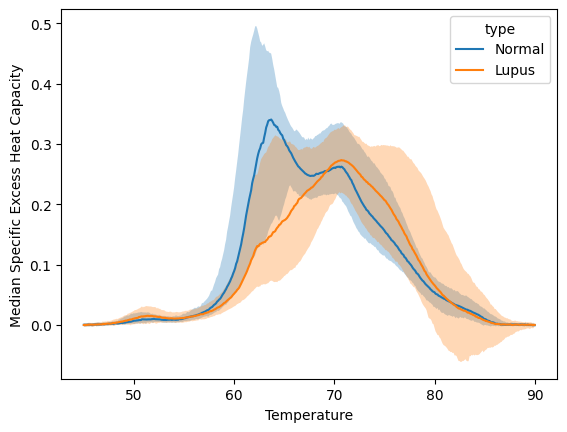

In [11]:
# Create a line plot using Seaborn with matching colors
sns.lineplot(data=median, x='temperature', y='median', hue='type')

# Create separate ribbons for each "type" with matching colors
for type_name in median['type'].unique():
    type_data = median[median['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Median Specific Excess Heat Capacity")
plt.show()

In [14]:
df_result = pd.read_excel("Lup_Control.xlsx")

df_result['max_depth'] = np.where(pd.isna(df_result['max_depth']), "None", df_result["max_depth"])
df_result['max_features'] = np.where(pd.isna(df_result['max_features']), "None", df_result["max_features"])
results = df_result.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
results.head(5)

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
1,100,236.0,log2,0.889571,0.965613
4,100,None,log2,0.889475,0.965817
10,250,None,log2,0.889236,0.966499
22,1000,None,log2,0.889054,0.967097
19,1000,236.0,log2,0.888990,0.967127
